# <a name='link1'>**E-news Express Project**</a>

## Problem Statement: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language?
5. Is the mean time spent on the new page same for the different language users?

**Considering a significance level of 0.05 for all tests.

## Data Dictionary
1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6. language_preferred - This represents the language chosen by the user to view the landing page.

### Importing necessary libraries

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats  # library with a large number of probability distributions as well as a growing library of statistical functions


In [2]:
#Loading the sample data set and verifying data
data=pd.read_csv('abtest.csv')
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [3]:
#taking a copy of the dataframe so as to retain the original one
df=data.copy()
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
#Check the shape of the dataset
df.shape

(100, 6)

So there are 100 observations in the dataset and 6 columns.

In [5]:
#Check info on the columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 6 columns of which 4 are string type, 1 is integer and 1 float. All columns has non-null data, so no missing values.

In [6]:
#Check the summary statistics on the 2 numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


user_id though a numeric column, it is an id value. So we won't be performing any numerical functions on this.

time_spent_on_the_page shows minimum is 0.19 and maximum is 10.71 and mean is at 5.3778 minutes. 

In [7]:
# Checking the summary on non-numeric attributes
df.describe(exclude='number')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,treatment,new,yes,French
freq,50,50,54,34


The describe on non-numeric attributes shows that:

group, landing_page and converted attributes have 2 unique values each and language_preferred has 3 unique values. 

converted has 'yes' as most frequent value with 54 occurrences.

language_preferred has 'French' as top frequeny value with 34 occurrences. group and landing_page has equal frequency of the 2 available values correspondingly.

In [8]:
# check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There is no missing values in any of the columns.

## Exploratory Data Analysis

### Univariate Analysis

In [9]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [11]:
#Analysis on user_id attribute
df['user_id'].value_counts().shape

(100,)

There are 100 unique user_ids in the dataset; this is just a unique id to identify each user.

### Group

In [12]:
#analysis on Group attribute
df['group'].value_counts()

treatment    50
control      50
Name: group, dtype: int64

There are 2 groups control and treatment with equal population; as explained in the problem statement the entire dataset of 100 users is split into 2 groups for abtest-- Control and Treatment

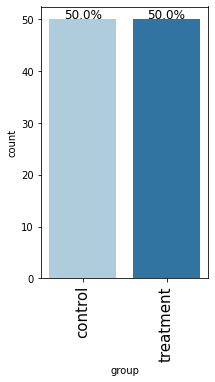

In [13]:
#Group is plotted using a bar plot
labeled_barplot(df, 'group', perc=True)

The same is observed in the boxplot as well, 50% for each of the group- Control and Treatment.

### Landing page

In [14]:
#Checking unique landing_page 
df['landing_page'].value_counts().shape

(2,)

There are 2 unique values in Landing_page.

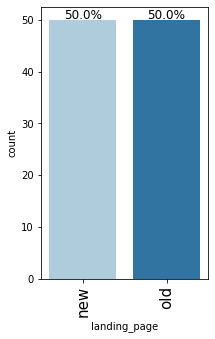

In [15]:
#plotting landing_page on barplot
labeled_barplot(df, 'landing_page', perc=True)

The users are divided to 50 for new landing page and 50 for old landing page

### Converted

In [16]:
# Check unique values in converted
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

There are 2 unique values for 'converted' attribute with values as 'yes' and 'no'.

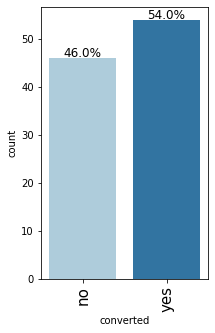

In [17]:
#Plotting converted on bar plot
labeled_barplot(df, 'converted', perc=True)

This shows 54% of users or 54 users from the 100 got converted to a subscriber of the news portal and 46 users didnt convert as subscribers.

### Language preferred

In [18]:
#Check unique values in language_preferred
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

There are 3 unique values in 'langauge_preferred' - English, French and Spanish.

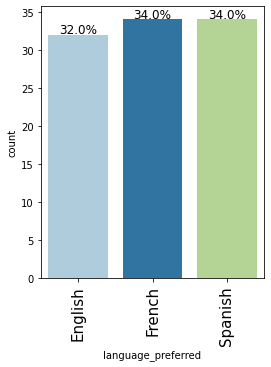

In [19]:
#Plotting language_preferred on bar plot
labeled_barplot(df, 'language_preferred', perc=True)

So 32% of users preferred English, 34% preferred French and 34% preferred Spanish as their language preferences.

### Time Spent on the page

In [20]:
#Checking unique counts on time spent
df['time_spent_on_the_page'].value_counts().shape

(94,)

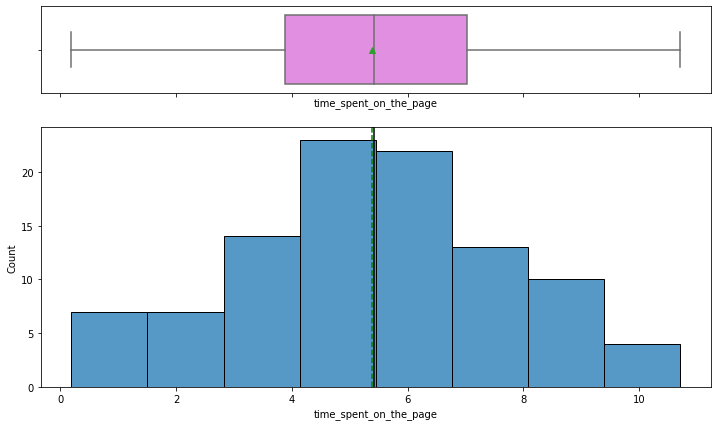

In [21]:
#Plotting time_spent_on_the_page using a histogram and box plot combination
histogram_boxplot(df, 'time_spent_on_the_page')

Average time spent is very close to the median value; so there doesnt seem to be any skewness in the data. 

Majority of the users spent around 4-6 minutes on the page.


### Bivariate analysis

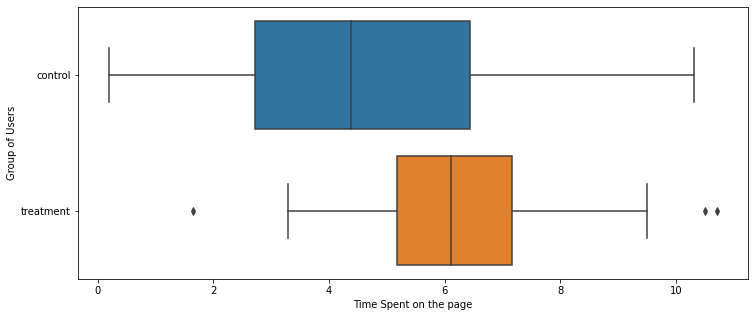

In [22]:
# Analysis of time_spent_on_the_page for each group
plt.figure(figsize=(12,5))
sns.boxplot(x = "time_spent_on_the_page", y = "group",data = df)
plt.xlabel('Time Spent on the page')
plt.ylabel('Group of Users')
plt.show()

Control group users have spent less time on the page, compared to the Treatment group. 

In [23]:
#Getting unique counts of converted users for each group
df.groupby(['group'])['converted'].value_counts()

group      converted
control    no           29
           yes          21
treatment  yes          33
           no           17
Name: converted, dtype: int64

Treatment group has 33 users who got converted and Control group has only 29 users who got converted as Subscribers.
So it is evident from the sample that Treatment group users who are served with the new landing page tend to convert to Subscribers more compared to control group.

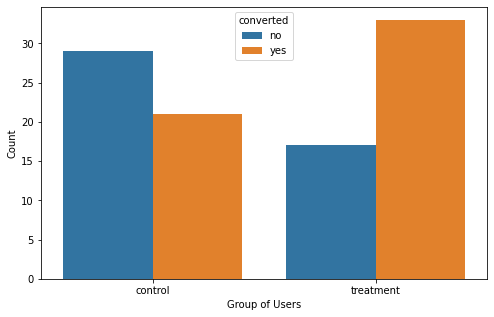

In [24]:
#Plotting Group vs Converted using Count plot
plt.figure(figsize=(8,5))
sns.countplot(df['group'],hue=df['converted'])
plt.xlabel('Group of Users')
plt.ylabel('Count')
plt.show()

The plot shows that users from Treatment group majorily converted to Subscriber of the news portal; as compared to number of users converted from Control group.

In [25]:
#Getting counts of language_preferred for each group
df.groupby(['group'])['language_preferred'].value_counts()

group      language_preferred
control    French                17
           Spanish               17
           English               16
treatment  French                17
           Spanish               17
           English               16
Name: language_preferred, dtype: int64

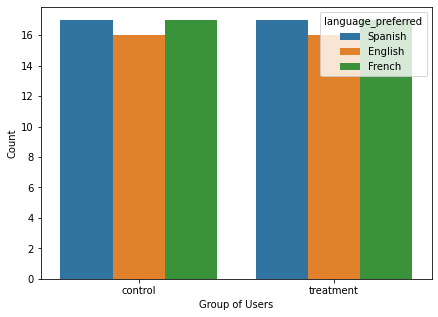

In [26]:
#Plotting Group vs lanugage_preferred using Count plot
plt.figure(figsize=(7,5))
sns.countplot(df['group'],hue=df['language_preferred'])
plt.xlabel('Group of Users')
plt.ylabel('Count')
plt.show()

Langauge preferred doesnt really vary much with the group of users. 

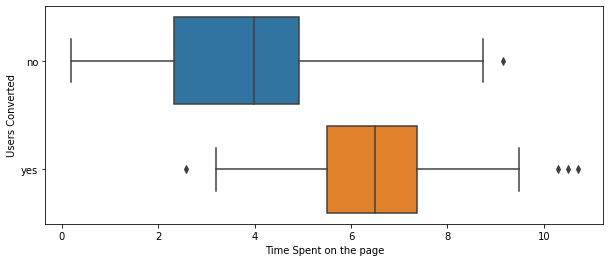

In [27]:
# Analysis to check if time_spent_on_the_page varies if Users converted to subscribers or not
plt.figure(figsize=(10,4))
sns.boxplot(x = "time_spent_on_the_page", y = "converted",data = df)
plt.xlabel('Time Spent on the page')
plt.ylabel('Users Converted')
plt.show()

This plot shows that Users who converted to Subscribers on the news portal did spend more time on the page, compared to users who did not subscribe.

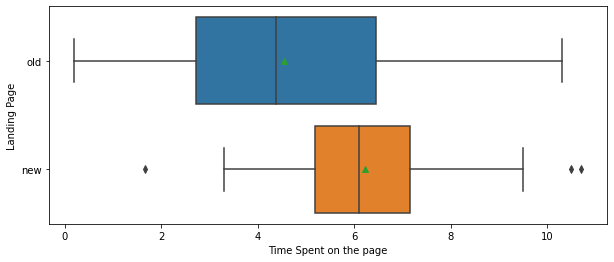

In [28]:
# Analysis to check if time_spent_on_the_page varies if the landing page is new or old.
plt.figure(figsize=(10,4))
sns.boxplot(x = "time_spent_on_the_page", y = "landing_page",data = df,showmeans=True)
plt.xlabel('Time Spent on the page')
plt.ylabel('Landing Page')
plt.show()

From this plot, for the sample considered here; Mean and Medain of new landing page is more than the old page. So it looks like the Users are spending more time on the new landing page than the old. 

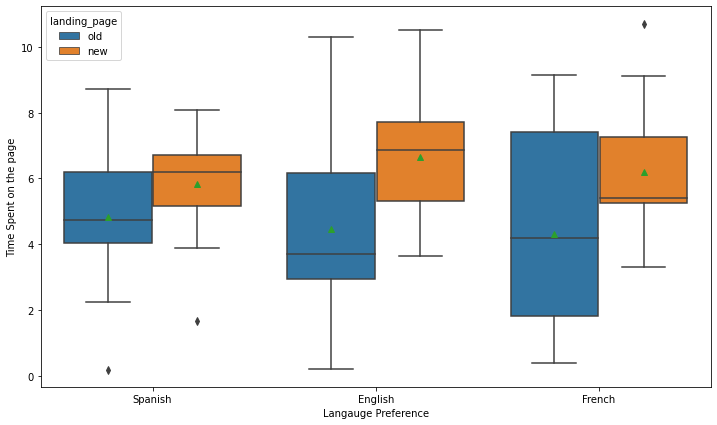

In [29]:
#Box plot to identify the Mean Time Spent on the New page, for each of the langauges preferred per landing_page
plt.figure(figsize=(12,7))
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page',showmeans=True,hue='landing_page')
plt.xlabel('Langauge Preference')
plt.ylabel('Time Spent on the page')
plt.show()

This plot shows the time spent on the landing page for each of the 3 languages preferred.
For the old and new pages, the means of time spent on the page are not too varying for the 3 languages. So, there may not be much of an impact of language preferred on the time spent on the pages.


**Plotting distribution for 'time_spent_on_the_page'**

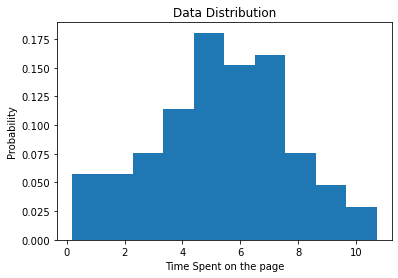

In [30]:
# visualize the distribution of the time spent on the page 
plt.hist(df["time_spent_on_the_page"], density=True)
plt.xlabel("Time Spent on the page")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()

In [31]:
# import the required function
from scipy.stats import norm

# estimate the mean and standard deviation of the Time Spent data
mu = df["time_spent_on_the_page"].mean()
sigma = df["time_spent_on_the_page"].std()
print("The estimated mean is", round(mu, 2))
print("The estimated standard deviation is", round(sigma, 2))

The estimated mean is 5.38
The estimated standard deviation is 2.38


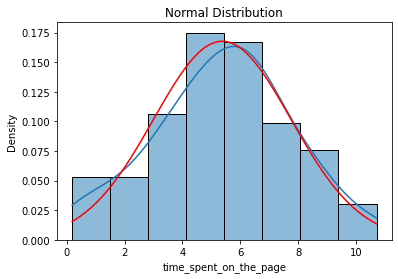

In [32]:
# calculate the pdf of time_spent_on_the_page using norm.pdf()
density = pd.DataFrame() # create an empty DataFrame
density["x"] = np.linspace(
    df["time_spent_on_the_page"].min(), df["time_spent_on_the_page"].max(), 100
) # create an array of 100 numbers in between the min and max time range and store it in the first column of the empty DataFrame
density["pdf"] = norm.pdf(density["x"], mu, sigma) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot
sns.histplot(df["time_spent_on_the_page"], ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

***So the time_spent_on_the_page is almost close to a normal distribution curve***

Let us try to do a hypothetical testing and determine whether Users spend more time on new landing page or old.

## <a name='link14'>***Conduct a hypothesis test to determine whether the users spend more time on new landing page than the old landing page. Using a level of significance as 5%***</a>

In [33]:
#Creating a dataframe for Users who are served the old landing page
df_oldpage = df.loc[df['landing_page']=='old']
df_oldpage.shape

(50, 6)

In [34]:
#Creating a dataframe for Users who are served the new landing page
df_newpage = df.loc[df['landing_page']=='new']
df_newpage.shape

(50, 6)

2 new dataframes are created with details of users who are served old landing page and new landing page; both has got 50 records each.

## Defining null and alternate hypotheses

$H_0:$ The mean time spent on the new landing page is equal to the mean time spent on the old landing page.

$H_a:$ The mean time spent on the new landing page is greater than the mean time spent on the old landing page.

Let $\mu_1$ and $\mu_2$ be the mean time spent on the new landing page and the mean time spent on the old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2 $

$H_a: \mu_1 > \mu_2 $

## Selecting Appropriate test

This is a case of a one-tailed two-sample mean test. As the two samples are independent in this case and the population standard deviations are unknown, we shall use a 2 sample t-test for this problem.

## Deciding Significance level

As given in the problem statement, we select $\alpha$ = 0.05.

## Calculating the p-value

**scipy.stats.ttest_ind is the function which can be used for finding the test statistic and p-value for the 2 Independent samples of observations. In our case, the standard deviation is unknown. 
Our alternative hypothesis is to find if average time spent on new landing page is greater than average time spent on old landing page; so we take 1 tail test with alternative as 'greater'.**

### Levene’s test - To identify if Standard deviations are equal or not

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest



In [35]:
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df['time_spent_on_the_page'][df['landing_page']=="new"], 
                                   df['time_spent_on_the_page'][df['landing_page']=="old"])
# find the p-value
print('The p-value is', round(p_value,3))


The p-value is 0.009


Since the p-value is less than 0.05, we reject the null hypothesis of homogeneity of variances. So the Variances are different.

In [36]:
# importing the required function
from scipy.stats import ttest_ind

# finding the test statistic and p-value
test_stat, p_value = ttest_ind(df_newpage['time_spent_on_the_page'], df_oldpage['time_spent_on_the_page'], 
                               equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


## Concluding based on comparison of the p-value with Significance level

In [37]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


## Inference from the test

Since the p-value is way less than the level of significance (of 5%), we reject the Null Hypothesis. 
So we have enough evidence to say that the mean time spent on the new landing page is greater than the average time spent on the old landing page.

Users are spending more time on the new landing page.

### Observations
The plot from the sample data showed that Users spent more time on the new landing page compared to the old one. Statistically also we were able to prove in this case that for the population, the Users are spending more time on the new landing page compared to old page. 

## <a name='link14'>***Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?***</a>

<AxesSubplot:xlabel='landing_page', ylabel='count'>

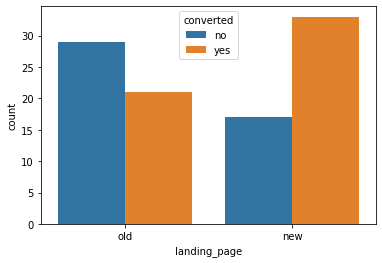

In [38]:
#Visual analysis of users visiting new landing page and getting converted vs old page and getting converted
sns.countplot(data=df,x='landing_page',hue='converted')

For the sample provided to us, from the plot we can see that the number of users who were served New landing page and got converted to Subscribers are more than the number of users served with old landing page and got converted.

***We will try to determine the same using Hypothesis testing, for finding the proportion on Population***

In [39]:
#Datatframe for Users who are served New landing page
df_newpage.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [40]:
#Taking counts on 'Converted' attribute for the New landing page users.
df_newpage['converted'].value_counts()

yes    33
no     17
Name: converted, dtype: int64

In [41]:
#Datatframe for Users who are served Old landing page
df_oldpage.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English


In [42]:
#Taking counts on 'Converted' attribute for the New landing page users.
df_oldpage['converted'].value_counts()

no     29
yes    21
Name: converted, dtype: int64

## Two Proportion Z-test

### Establishing the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of users who visited new page and old page and got converted respectively.

Let us test the null hypothesis

>$H_0:p_1 = p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Checking whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user visiting a page can convert to subscriber or not.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $


## Deciding the significance level

As given in the problem statement, we select α = 0.05.

In [43]:
# number of users who were served new landing page and converted as Subscribers
new_converted = df[df['landing_page']=='new'].converted.value_counts()['yes']
# number of users who were served old landing page and converted as Subscribers
old_converted = df[df['landing_page']=='old'].converted.value_counts()['yes']


print('The numbers of Users who used New page and converted and users who tried old page and converted are {0} and {1} respectively.'.format(new_converted, old_converted))

# number of users served new page
n_newpage = df.landing_page.value_counts()['new']

# number of users served old landing page
n_oldpage = df.landing_page.value_counts()['old']

print('The total numbers of users served new page and old page are {0} and {1} respectively.'.format(n_newpage, n_oldpage))

The numbers of Users who used New page and converted and users who tried old page and converted are 33 and 21 respectively.
The total numbers of users served new page and old page are 50 and 50 respectively.


In [44]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted], [n_newpage, n_oldpage],alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


## Concluding based on comparison of the p-value with Significance level

In [45]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


**Inference**

The p_value is less than 0.05 (significance level of 5%), we reject the Null Hypothesis. So we have enough statistical evidence to say that the proportion of users who visited new page and getting converted is more than the proportion of users visiting old page and getting converted.

## Observations and Findings
From the sample data we observed that the proportion of users who visited new page and got converted to be Subscribers are more than the proportion of users who visited old page and got converted.
The same holds true for the population as well, as per our statistical analysis.

## <a name='link14'>***Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]***</a>

<AxesSubplot:xlabel='language_preferred', ylabel='count'>

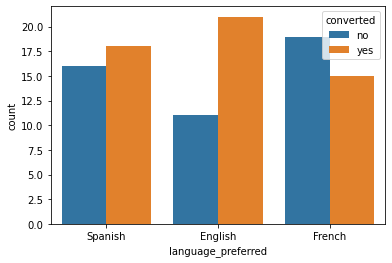

In [46]:
#Count plot to verify the dependency of Language preferred vs converted status
sns.countplot(data=df,hue='converted',x='language_preferred')

The plot shows there are more number of users who got converted, who has English as language preferred. But we cannot be sure about this dependency just looking at this sample.

***We will try to determine this dependency with Hypothesis test***

In [47]:
#Creating a Contingency table with language_preferred and converted to find the dependency
df1=pd.crosstab(df['language_preferred'],df['converted'])
df1

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


## Chi-Square Test for Independence

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Converted status is independent of Language preference.

against the alternate hypothesis

>$H_a:$ Converted status depends on Language preference.



### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


## Deciding the significance level

As given in the problem statement, we select α = 0.05.

In [48]:
#import necessary libraries
from scipy.stats import chi2_contingency
#finding p_value from Chi square test
chi, p_value, dof, expected = chi2_contingency(df1)
print('p-value is:', p_value)

p-value is: 0.2129888748754345


## Concluding based on comparison of the p-value with Significance level

In [49]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


**Inference**

The p_value is greater than 0.05 (significance level of 5%), we fail to reject the Null Hypothesis. So we dont have enough statistical evidence to say that the Converted Status depends on Language Preference.
Converted Status is independent of Language Preference.

### Observations:

There is no enough statistical evidence to prove that Converted Status depends on Language preference.
So Converted Status is  independent of Language Preference.

## <a name='link14'>***Is the mean time spent on the new page same for the different language users?***<a/>

In [50]:
#dataframe created for user details with new landing page
df_newpage.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [51]:
df_newpage.shape

(50, 6)

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

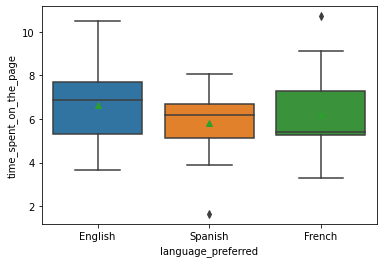

In [52]:
#Box plot to identify the Mean Time Spent on the New page, for each of the langauges preferred
sns.boxplot(data=df_newpage,x='language_preferred',y='time_spent_on_the_page',showmeans=True)

From the plot, for the sample data it is evident that the Mean value of time spent on the New landing page is almost the same for the 3 langauges preferred; not a considerable difference.

In [53]:
mean_english=df_newpage.loc[df_newpage['language_preferred']=='English']['time_spent_on_the_page'].mean()
mean_spanish=df_newpage.loc[df_newpage['language_preferred']=='Spanish']['time_spent_on_the_page'].mean()
mean_french=df_newpage.loc[df_newpage['language_preferred']=='French']['time_spent_on_the_page'].mean()
print('Avg time spent on the new page for English:', round(mean_english,3))
print('Avg time spent on the new page for French:', round(mean_french,3))
print('Avg time spent on the new page for Spanish:', round(mean_spanish,3))  

Avg time spent on the new page for English: 6.664
Avg time spent on the new page for French: 6.196
Avg time spent on the new page for Spanish: 5.835


We will find if Mean values are the same or not, using Hypothesis testing.

## Analysis of Variance ANOVA test

## Lets define null and alternate hypotheses

$H_0$ : The mean time spent on the new page for different language users is equal.

$H_a$ : At least one of the mean time spent on the new page for the three diferent language users is different.

## Selecting Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The time spent follow a normal distribution

against the alternative hypothesis

>$H_a:$ The time spent do not not follow a normal distribution

In [54]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df_newpage['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [55]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(df_newpage[df_newpage['language_preferred']=='English']['time_spent_on_the_page'],
                            df_newpage[df_newpage['language_preferred']=='Spanish']['time_spent_on_the_page'],
                            df_newpage[df_newpage['language_preferred']=='French']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

## Deciding the significance level

As given in the problem statement, we select α = 0.05.

## Collection and preparation of data

In [56]:
# separate the weightlosses with respect to the three diet-plans
timespent_English = df_newpage[df_newpage['language_preferred']=='English']['time_spent_on_the_page']
timespent_French = df_newpage[df_newpage['language_preferred']=='French']['time_spent_on_the_page']
timespent_Spanish = df_newpage[df_newpage['language_preferred']=='Spanish']['time_spent_on_the_page']

## Calculating the p-value

In [57]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test using the f_oneway function from scipy.stats library
test_stat, p_value = stats.f_oneway(timespent_English, timespent_French, timespent_Spanish)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


## Comparing the p-value with $\alpha$

In [58]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


## Inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we don't have enough statistical evidence to conclude that significant difference exists between the means of time spent of new page for the different language users.

Time spent on the new page doesn't show a significant dependency on language preferred.

### Multiple Comparison test (Tukey HSD)


A multi comparison test to verify if mean time spent on new page is different for the 3 langauges, 
the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [59]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df_newpage['time_spent_on_the_page'], groups = df_newpage['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7259 -2.0035  1.069  False
English Spanish  -0.8285  0.401 -2.3647 0.7078  False
 French Spanish  -0.3612  0.816  -1.874 1.1516  False
-----------------------------------------------------


The multi comparison Tukey HSD test also shows that there is no significant difference between means of the time spent for the 3 languages.

# Conclusion:
* A dataset of E-news Express details were analyzed, which contained a total of 100 observations with 6 data attributes. The data had details of 2 user groups Control and Treatment who were served old and new landing pages, respectively. There were attributes like time spent on the page by users, their conversion status to Subscribers and their language preference. The objective of the analysis was to understand the trend of data and determine if the new landing page is attracting more users to become Subscribers of the news portal.


* From the statistical analysis of the data, the users who were served the new landing page have majorly converted to Subscribers and spent more time on the page. So, the features introduced in the new landing page did attract more users and can be a good reason for Business improvement.


* The Language preference of the users is not really having any impact on the time spent on the page or the converted status of the users.


# Recommendations:


* In addition to acquiring new subscribers, it is important to hold the existing subscribers. Some user specific features could be introduced like Live updates of breaking news, specific news corner based on users’ interest (from their past browsing history).


* It is advisable to monitor users’ clickstream data on the landing page for a period of time and then analyze if the users would be interested in a specific feature and then can be introduced.


* Users who spend more time on the page majorly Subscribed to the news portal; so it is recommended to catch users' attention with most accurate and live news with all possible video clips and images.

# Further Analysis:
* There was not enough detail mentioned in this dataset as to which specific feature was introduced in the new landing page, may be a further analysis is possible if there were other attributes available that can improve users to get converted to Subscribers. 


* Users look for accuracy of data on the news portal and the most live updates. So, attributes identifying how accurate the data is and how timely the news is been posted on the portal could be good data points for further analysis and Business improvement. 
